In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
df = pd.read_excel("World_Development_Indicators.xlsx", index_col=0).transpose()

In [3]:
df = df.reset_index()
df = df.drop(columns=['index'])
df.columns

Index(['Year', 'GDP', 'Imports', 'Exports', 'Dept'], dtype='object')

In [4]:
df['Year'] = df['Year'].apply(lambda x: int(x[:4]))

In [5]:
df['GDP'].fillna(0, inplace=True)
df['Exports'].fillna(method='ffill', inplace=True)
df['Imports'].fillna(method='ffill', inplace=True)
df['Dept'].fillna(method='ffill', inplace=True)

In [6]:
df['Year'] = df['Year'].astype(int)

In [7]:
df.head()

,Year,GDP,Imports,Exports,Dept
0,2022,6.000000,NaN,NaN,NaN
1,2021,4.551848,6.266213e+10,3.556588e+10,1.304331e+11
2,2020,-0.970295,5.209794e+10,2.733307e+10,1.156953e+11
3,2019,3.162674,5.797608e+10,3.067015e+10,1.078829e+11
4,2018,4.532445,6.842288e+10,3.077489e+10,9.922396e+10


In [8]:
df_filtered = df[df['Year'].between(1998, 2022)]

## GDP Growth Analysis in Pakistan

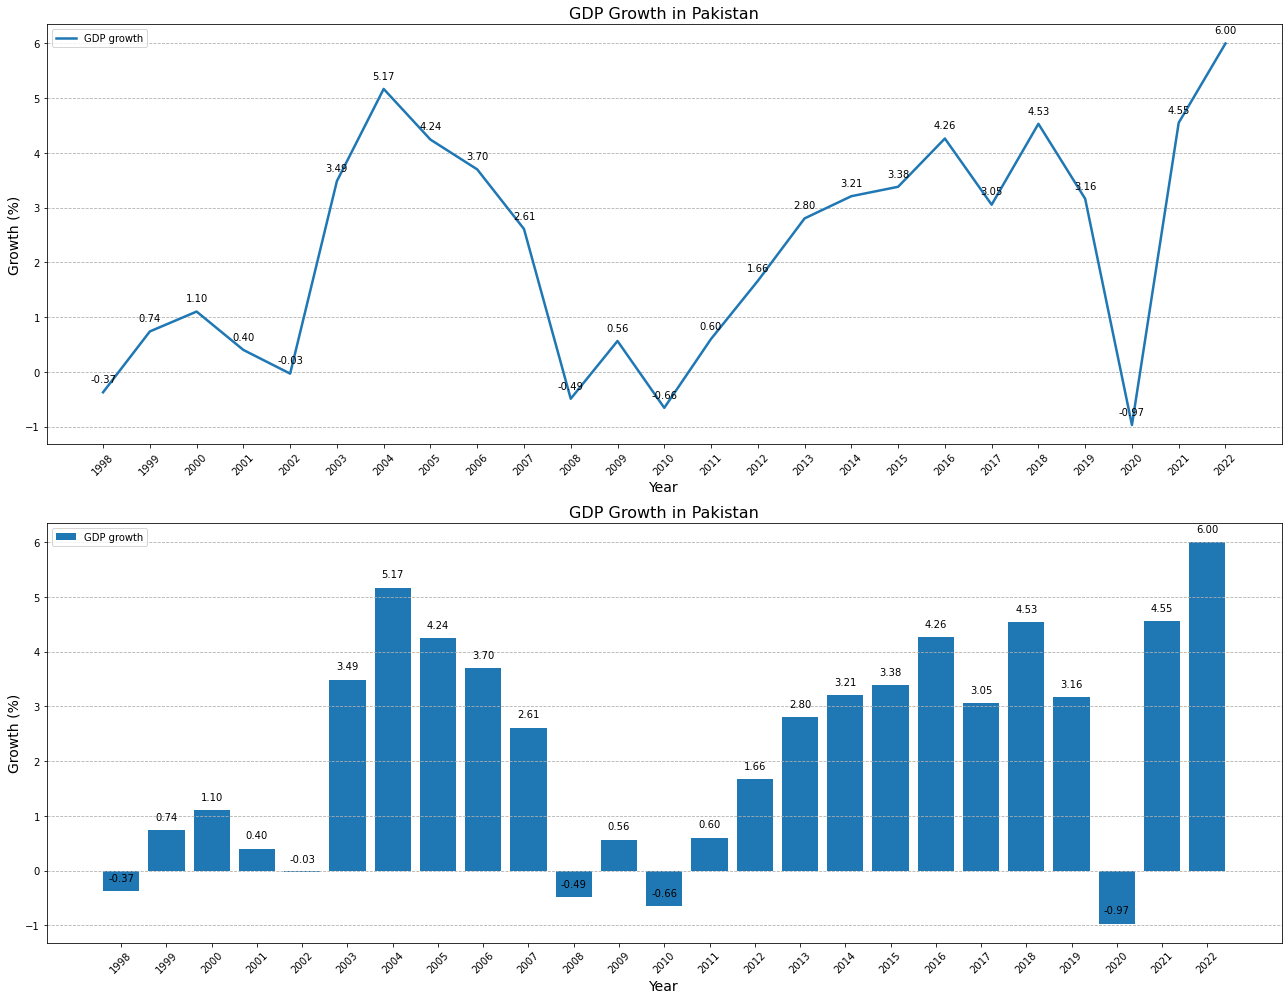

In [9]:
# Line plot
fig, axs = plt.subplots(2, 1, figsize=(18, 14))

axs[0].plot(df_filtered['Year'], df_filtered['GDP'], label='GDP growth', color='#1f77b4', linewidth=2.5)
axs[0].set_title('GDP Growth in Pakistan', fontsize=16)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Growth (%)', fontsize=14)
axs[0].set_xticks(df_filtered['Year'])
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--')

for x, y in zip(df_filtered['Year'], df_filtered['GDP']):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
axs[0].legend(loc="upper left")

# Bar chart
axs[1].bar(df_filtered['Year'], df_filtered['GDP'], label='GDP growth', color='#1f77b4')
axs[1].set_title('GDP Growth in Pakistan', fontsize=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Growth (%)', fontsize=14)
axs[1].set_xticks(df_filtered['Year'])
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--')

for x, y in zip(df_filtered['Year'], df_filtered['GDP']):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
axs[1].legend(loc="upper left")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


## Exports and Imports Analysis in Pakistan

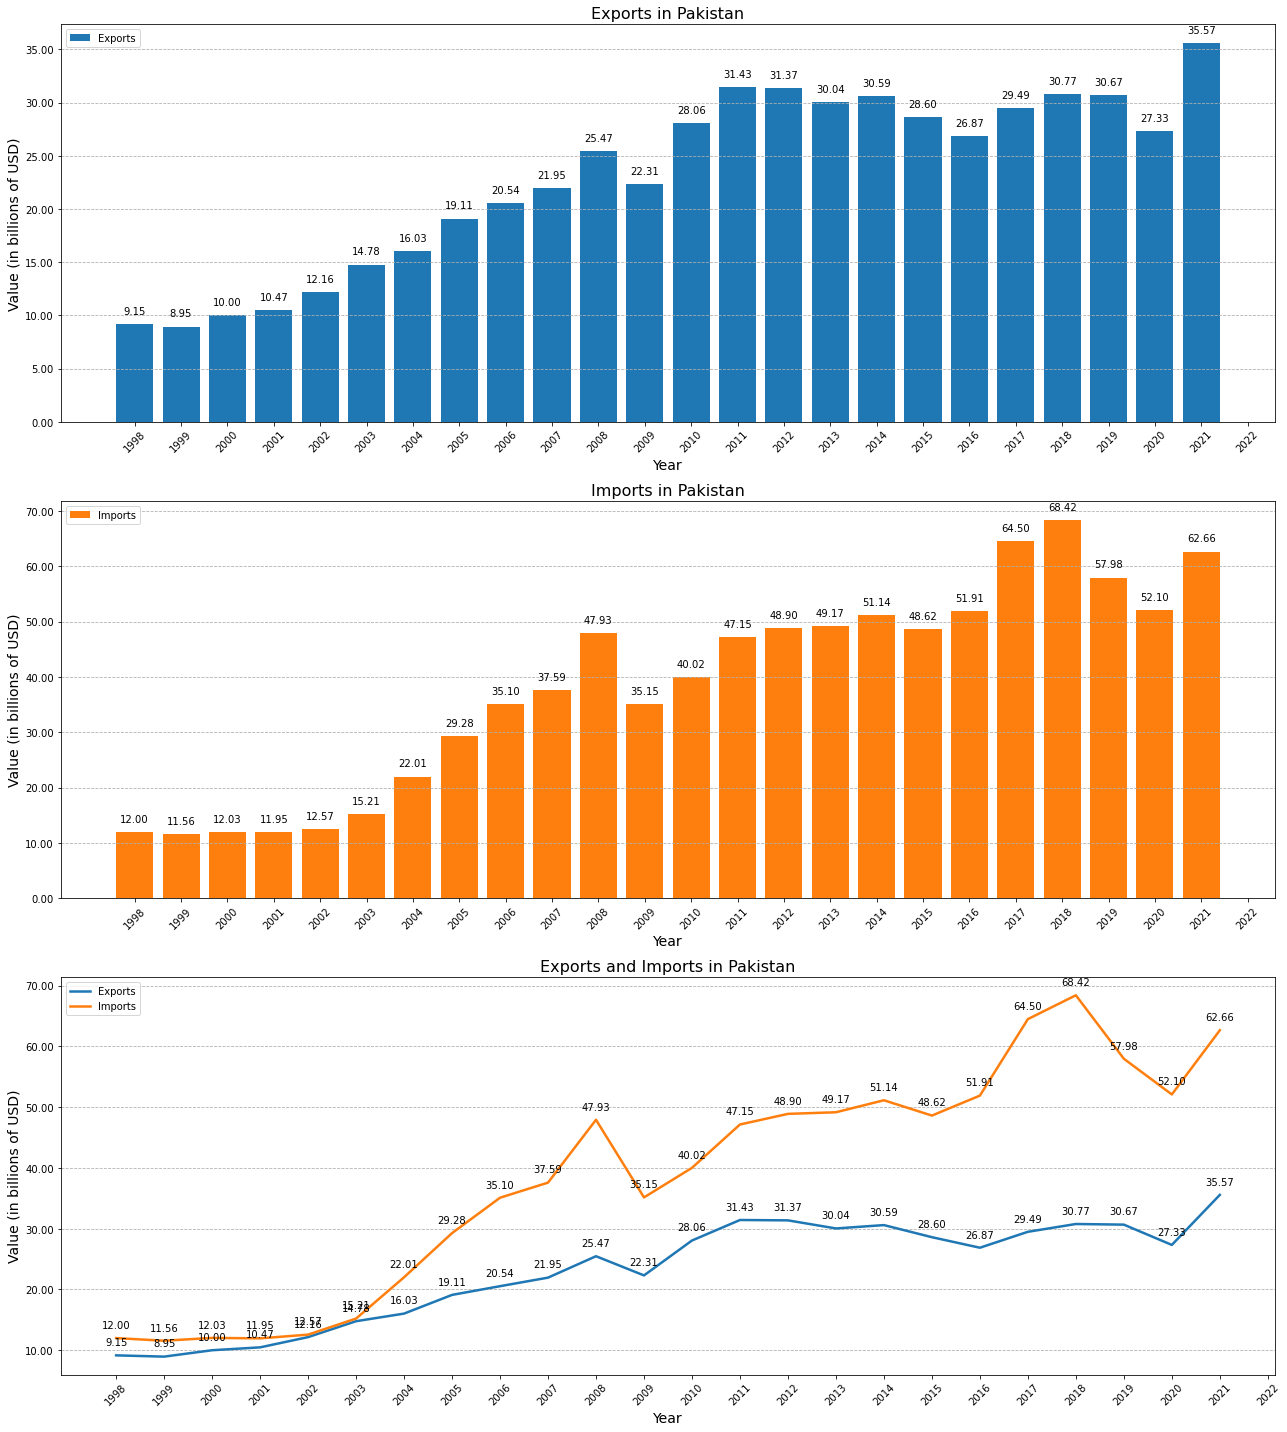

In [10]:
# Define custom color scheme
colors = ['#1f77b4', '#ff7f0e']

# Set figure size and subplots
fig, axs = plt.subplots(3, 1, figsize=(18, 20))

# Plot exports
axs[0].bar(df_filtered['Year'], df_filtered['Exports'], label='Exports', color=colors[0])
axs[0].set_title('Exports in Pakistan', fontsize=16)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Value (in billions of USD)', fontsize=14)
axs[0].set_xticks(df_filtered['Year'])
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--')
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1e9)))

for x, y in zip(df_filtered['Year'], df_filtered['Exports']):
    label = "{:.2f}".format(y/1e9)
    axs[0].annotate(label, (x, y), textcoords="offset points",xytext=(0,10), ha='center', fontsize=10)
axs[0].legend(loc="upper left")

# Plot imports
axs[1].bar(df_filtered['Year'], df_filtered['Imports'], label='Imports', color=colors[1])
axs[1].set_title('Imports in Pakistan', fontsize=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Value (in billions of USD)', fontsize=14)
axs[1].set_xticks(df_filtered['Year'])
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--')
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1e9)))

for x, y in zip(df_filtered['Year'], df_filtered['Imports']):
    label = "{:.2f}".format(y/1e9)
    axs[1].annotate(label, (x, y), textcoords="offset points",xytext=(0,10), ha='center', fontsize=10)
axs[1].legend(loc="upper left")

# Plot exports and imports
axs[2].plot(df_filtered['Year'], df_filtered['Exports'], label='Exports', color=colors[0], linewidth=2.5)
axs[2].plot(df_filtered['Year'], df_filtered['Imports'], label='Imports', color=colors[1], linewidth=2.5)
axs[2].set_title('Exports and Imports in Pakistan', fontsize=16)
axs[2].set_xlabel('Year', fontsize=14)
axs[2].set_ylabel('Value (in billions of USD)', fontsize=14)
axs[2].set_xticks(df_filtered['Year'])
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(axis='y', linestyle='--')
axs[2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1e9)))

for x, y in zip(df_filtered['Year'], df_filtered['Exports']):
    label = "{:.2f}".format(y/1e9)
    axs[2].annotate(label, (x, y), textcoords="offset points",xytext=(0,10), ha='center', fontsize=10)

for x, y in zip(df_filtered['Year'], df_filtered['Imports']):
    label = "{:.2f}".format(y/1e9)
    axs[2].annotate(label, (x, y), textcoords="offset points",xytext=(0,10), ha='center', fontsize=10)
axs[2].legend(loc="upper left")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Trade Deficits Analysis in Pakistan

In [11]:
df['Deficit'] = df['Imports'] - df['Exports']
df_filtered = df[df['Year'].between(1998, 2022)]

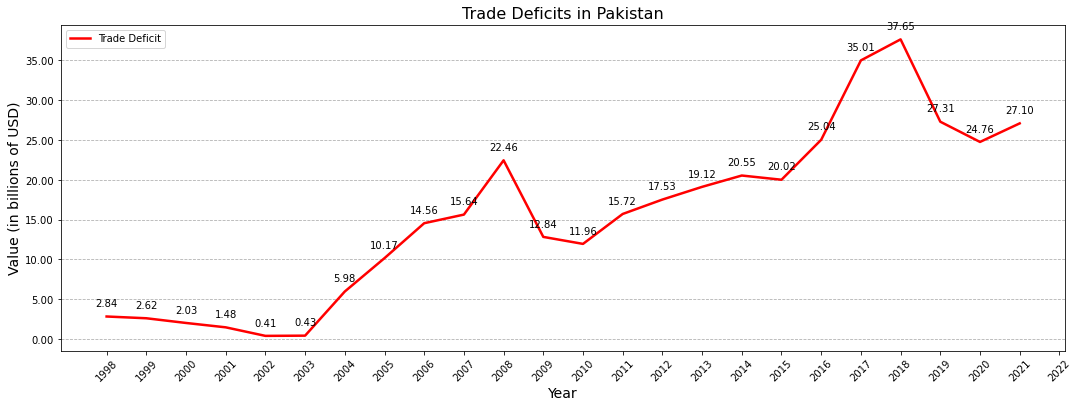

In [12]:
plt.figure(figsize=(18, 6))
plt.plot(df_filtered['Year'], df_filtered['Deficit'], label='Trade Deficit', color='red', linewidth=2.5)
plt.title('Trade Deficits in Pakistan', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (in billions of USD)', fontsize=14)
plt.xticks(df_filtered['Year'], rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1e9)))
plt.grid(axis='y', linestyle='--')

for x, y in zip(df_filtered['Year'], df_filtered['Deficit']):
    label = "{:.2f}".format(y/1e9)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
plt.legend(loc="upper left")
plt.show()

## Debt Analysis in Pakistan

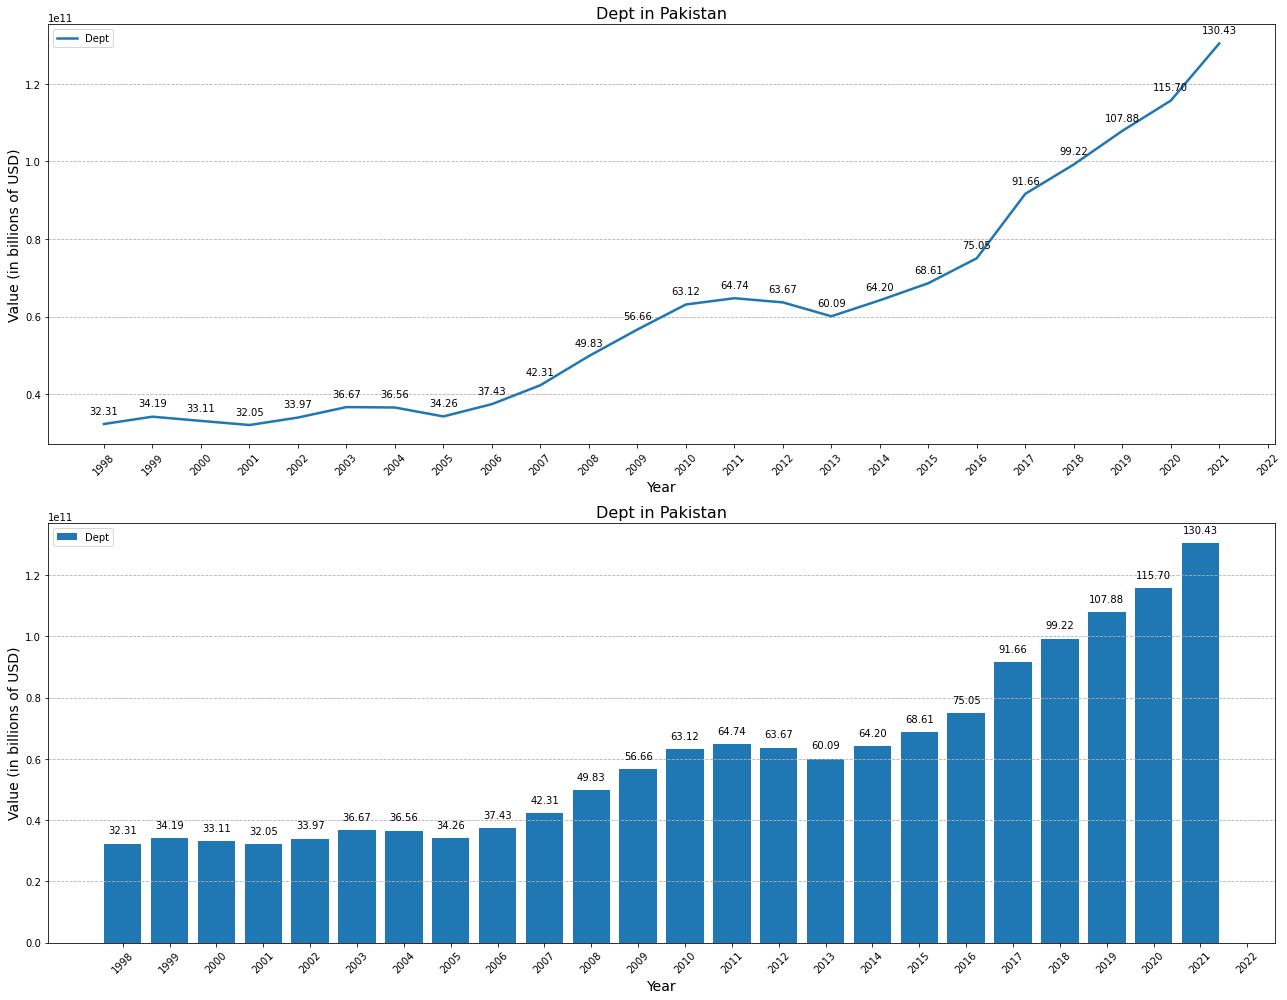

In [13]:
# Line plot
fig, axs = plt.subplots(2, 1, figsize=(18, 14))

axs[0].plot(df_filtered['Year'], df_filtered['Dept'], label='Dept', color='#1f77b4', linewidth=2.5)
axs[0].set_title('Dept in Pakistan', fontsize=16)
axs[0].set_xlabel('Year', fontsize=14)
axs[0].set_ylabel('Value (in billions of USD)', fontsize=14)
axs[0].set_xticks(df_filtered['Year'])
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--')

for x, y in zip(df_filtered['Year'], df_filtered['Dept']):
    label = "{:.2f}".format(y/1e9)
    axs[0].annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
axs[0].legend(loc="upper left")

# Bar chart
axs[1].bar(df_filtered['Year'], df_filtered['Dept'], label='Dept', color='#1f77b4')
axs[1].set_title('Dept in Pakistan', fontsize=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Value (in billions of USD)', fontsize=14)
axs[1].set_xticks(df_filtered['Year'])
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--')

for x, y in zip(df_filtered['Year'], df_filtered['Dept']):
    label = "{:.2f}".format(y/1e9)
    axs[1].annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
axs[1].legend(loc="upper left")

# Adjust layout and display plots
plt.tight_layout()
plt.show()
